# Simulated Active Learning Methods
## Libraries

In [1]:
#Standard
import asyncio
from os import getcwd, path
#External
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import BayesianRidge
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

#Custom
from modules.custom import split, getPI

## Standard Data Retrival

In [2]:
dataRoute = path.join(getcwd(), 'data', 'chembl', 'Additional_datasets')
dataSets = [pd.read_csv(path.join(dataRoute, 'data_CHEMBL313.csv')),
            pd.read_csv(path.join(dataRoute, 'data_CHEMBL2637.csv')),
            pd.read_csv(path.join(dataRoute, 'data_CHEMBL4124.csv'))]

data = dataSets[1].sample(frac=1, random_state=1)

display(data)

,molecule_id,pXC50,b0001,b0002,b0003,b0004,b0005,b0006,b0007,b0008,...,b1015,b1016,b1017,b1018,b1019,b1020,b1021,b1022,b1023,b1024
393,CHEMBL1537195,5.225,1,1,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
607,CHEMBL1783489,4.699,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
336,CHEMBL1488035,4.440,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
555,CHEMBL1761565,7.155,1,0,1,0,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
325,CHEMBL1477311,5.099,1,0,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,CHEMBL191003,5.886,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
905,CHEMBL2334704,5.579,1,0,1,1,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
1096,CHEMBL494272,5.000,1,1,1,0,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
235,CHEMBL1391112,4.450,1,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


## Single Model, Least Certain

In [3]:
## Model Selection is not being tested here, so linear regression is used for speed
X_known, Y_known, X_unknown, Y_unknown, X_test, Y_test = split(data)
pipe = Pipeline([('model', BayesianRidge())])

pipe.fit(X_known, Y_known)
pred_y, std_y = pipe.predict(X_unknown, return_std=True)
std_y.sort_values()

445     0.001531
841     0.001598
122     0.001619
588     0.001621
229     0.001806
          ...   
935     0.142569
397     0.143925
282     0.147873
2       0.152804
1201    0.161027
Length: 1069, dtype: float64

200 of 200

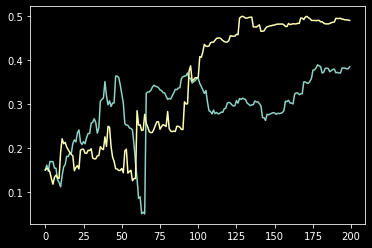

In [4]:
score1 = []
score2 = []
additional = 20

for i in range(additional):
    print(f"\r{i+1} of {additional}", end="")
    x1, y1, _, _, _, _ = split(data, 20 + i)
    pipe.fit(x1, y1)
    score1.append(pipe.score(X_test, Y_test))

for i in range(additional):
    print(f"\r{i+1} of {additional}", end="")
    pipe.fit(X_known, Y_known)
    pred_y, std_y = pipe.predict(X_unknown, return_std=True)
    index = std_y.sort_values()
    score2.append(pipe.score(X_test, Y_test))
    X_known, Y_known, X_unknown, Y_unknown = getPI((X_known, Y_known), (X_unknown, Y_unknown), index.index[-1], data)

plt.plot(score1)
plt.plot(score2)


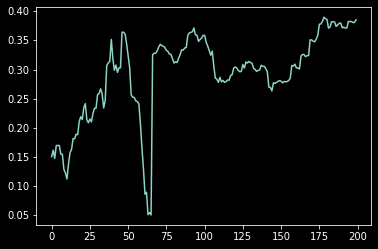

In [5]:
plt.plot(score1)

## Different Models

In [1]:
X_known, Y_known, X_unknown, Y_unknown, X_test, Y_test = split(data)
pipes = [Pipeline([('model', MultinomialNB())]),
         Pipeline([('model', SVC())]),
         Pipeline([('model', GaussianNB())])]


for i in range(additional):
    print(f"\r{i+1} of {additional}", end="")
    x1, y1, _, _, _, _ = split(data, 20 + i)
    pipe.fit(x1, y1)
    score1.append(pipe.score(X_test, Y_test))

for i in range(additional):
    print(f"\r{i+1} of {additional}", end="")
    for pipe in pipes:
        pipe.fit(X_known, Y_known)
    pred_y, std_y = pipe.predict(X_unknown, return_std=True)
    index = std_y.sort_values()
    score2.append(pipe.score(X_test, Y_test))
    X_known, Y_known, X_unknown, Y_unknown = getPI((X_known, Y_known), (X_unknown, Y_unknown), index.index[-1], data)

NameError: name 'split' is not defined